ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

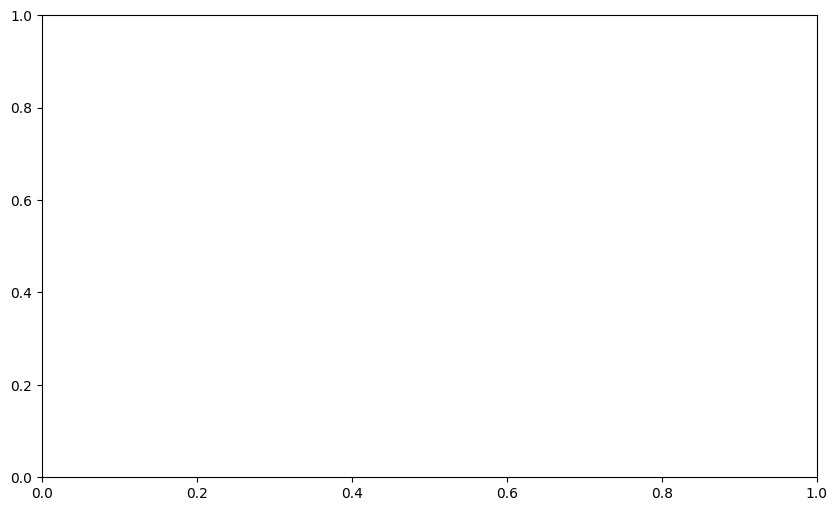

In [19]:

import matplotlib.pyplot as plt

# Sample data: three runs for two metrics.
runs = [0, 1, 2]
metric_a_values = [0.85, 0.78, 0.90]  # AUC values across runs (mean ± std)
metric_b_values = [0.65, 0.70, 0.68]  # F1 scores across runs

# Calculate mean and standard deviation for each metric.
mean_a = sum(metric_a_values) / len(metric_a_values)
std_a = round((sum((x - mean_a)**2 for x in metric_a_values)/len(metric_a_values))**0.5, 3)

mean_b = sum(metric_b_values) / len(metric_b_values)
std_b = round((sum((x - mean_b)**2 for x in metric_b_values)/len(metric_b_values))**0.5, 3)

# Plot
plt.figure(figsize=(10, 6))
for i, (a, b) in enumerate(zip(metric_a_values, metric_b_values)):
    plt.plot(runs, [a], marker='o', markersize=8)
    plt.errorbar(runs[i], a, yerr=[mean_a - std_a if mean_a > std_a else 0 for _ in range(3)], 
                 fmt='none', capsize=5)

plt.title("Performance Metrics Across Runs")
plt.xlabel("Run Number (Average of Three)")
plt.ylabel("Metric Value")
plt.legend(["AUC", "F1"])
plt.grid(True)
plt.show()


In [21]:
data

{'Run': [0, 1, 2, 0, 1, 2],
 'Metric': ['AUC', 'AUC', 'AUC', 'F1', 'F1', 'F1'],
 'Value': [0.85, 0.78, 0.9, 0.65, 0.7, 0.68]}

In [ ]:
Half Network	Base	17	0.8728	0.8802	0.8809
Half Network	Base65	17	0.8622	0.8704	0.8622
Half Network	Grey	17	0.8651	0.8434	0.8706
Half Network	Grey65	17	0.8813	0.8537	0.8764
Half Network	Single	17	0.8662	0.8657	0.858
Half Network	Single65	17	0.8576	0.87	0.8586

In [24]:
weights = ["Base", "Base65", "Grey", "Grey65", "Single", "Single65"]*3
training = ["Half Network"]*len(weights)
dataset = ["Internal"]*len(weights)
runs = [1,2,3]*6
aucs = [0.8728, 0.8802, 0.8809, 0.8622, 0.8704, 0.8622, 0.8651, 0.8434, 0.8706, 0.8813, 0.8537, 0.8764, 0.8662, 0.8657, 0.858, 0.8576, 0.87, 0.8586]

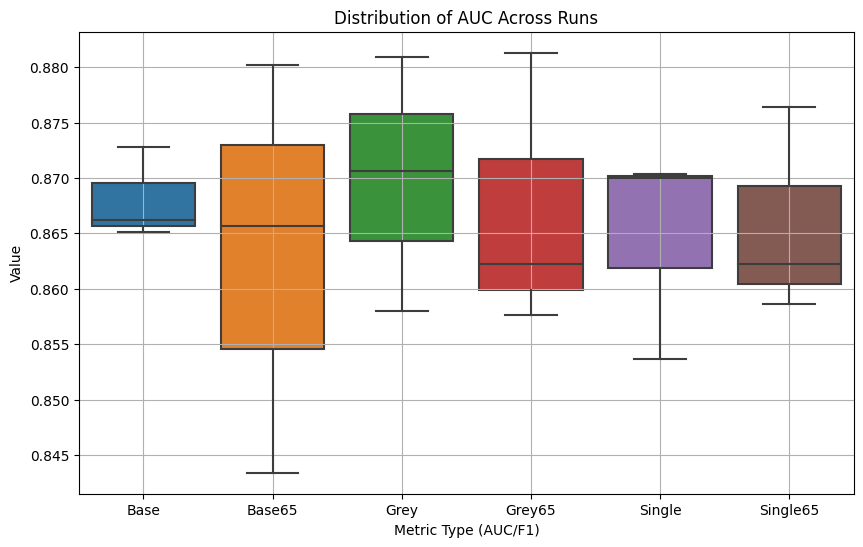

In [25]:
data = {
    "Run":runs,
    "Weights": weights,
    "Training": training,
    "AUCs": aucs,
    "Dataset": dataset
}
plt.figure(figsize=(10, 6))
sns.boxplot(x="Weights", y="AUCs", data=data)
plt.title("Distribution of AUC Across Runs")
plt.xlabel("Metric Type (AUC/F1)")
plt.ylabel("Value")
plt.grid(True)
plt.show()

0      0
1      0
2      0
3      0
4      0
      ..
211    3
212    3
213    3
214    3
215    3
Name: test_set, Length: 216, dtype: object

In [27]:
data.head()

,strategy,weight_type,run_number,test_set,auc
0,Half Network,Base,1,internal,0.8728
1,Half Network,Base,2,internal,0.8802
2,Half Network,Base,3,internal,0.8809
3,Half Network,Base65,1,internal,0.8622
4,Half Network,Base65,2,internal,0.8704


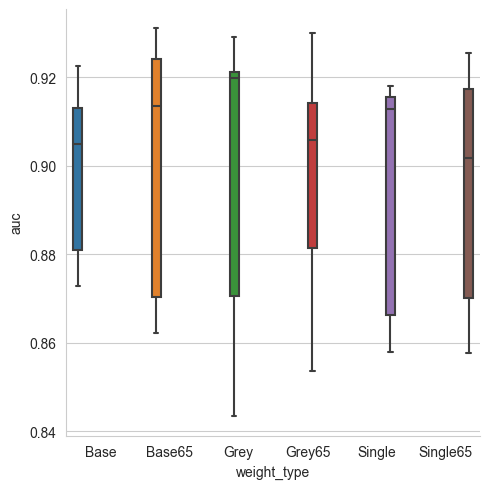

In [45]:
sns.catplot(x = "weight_type", hue="weight_type", y="auc", data=data.query("test_set =='internal'") , kind="box")

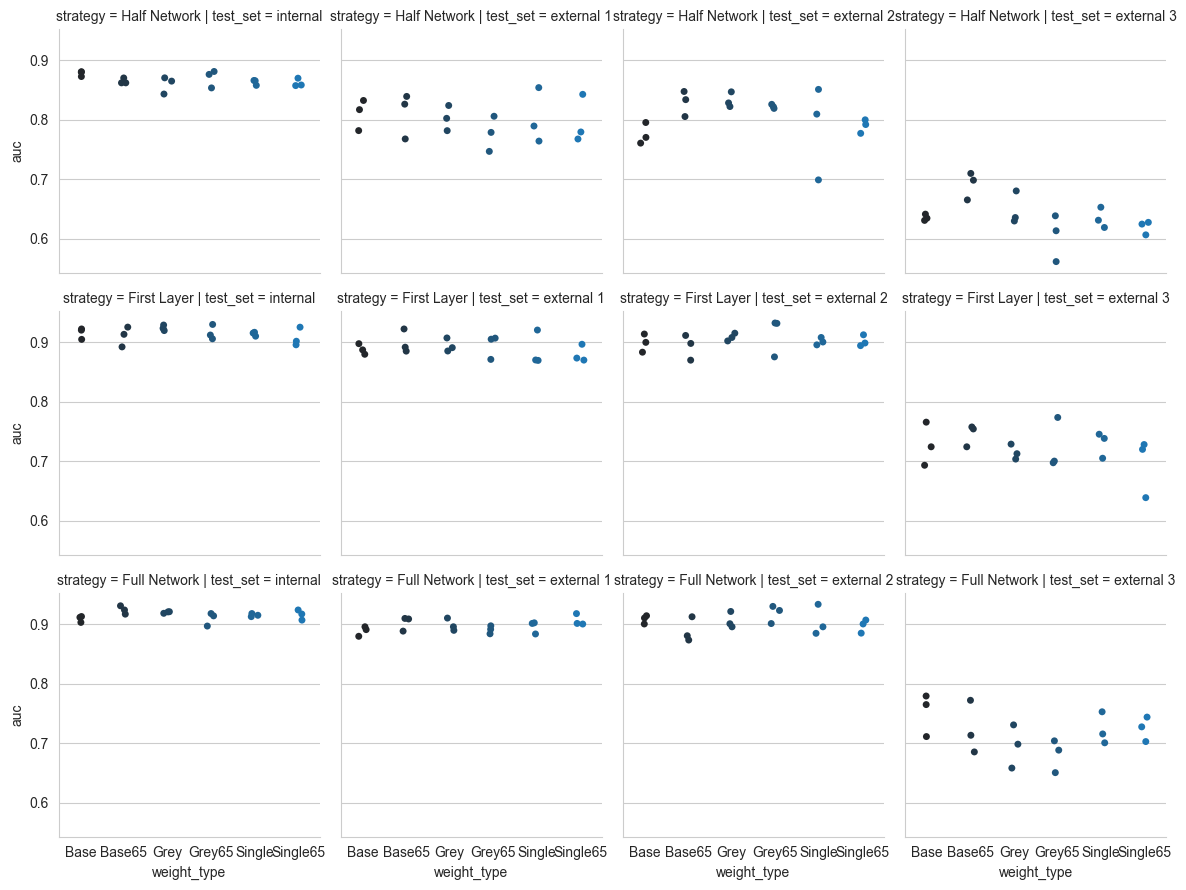

In [48]:
data = pd.read_csv('aucs.csv')
g = sns.FacetGrid(data, col="test_set",  row="strategy")
g.map_dataframe(sns.stripplot, x="weight_type", y="auc",hue="weight_type")

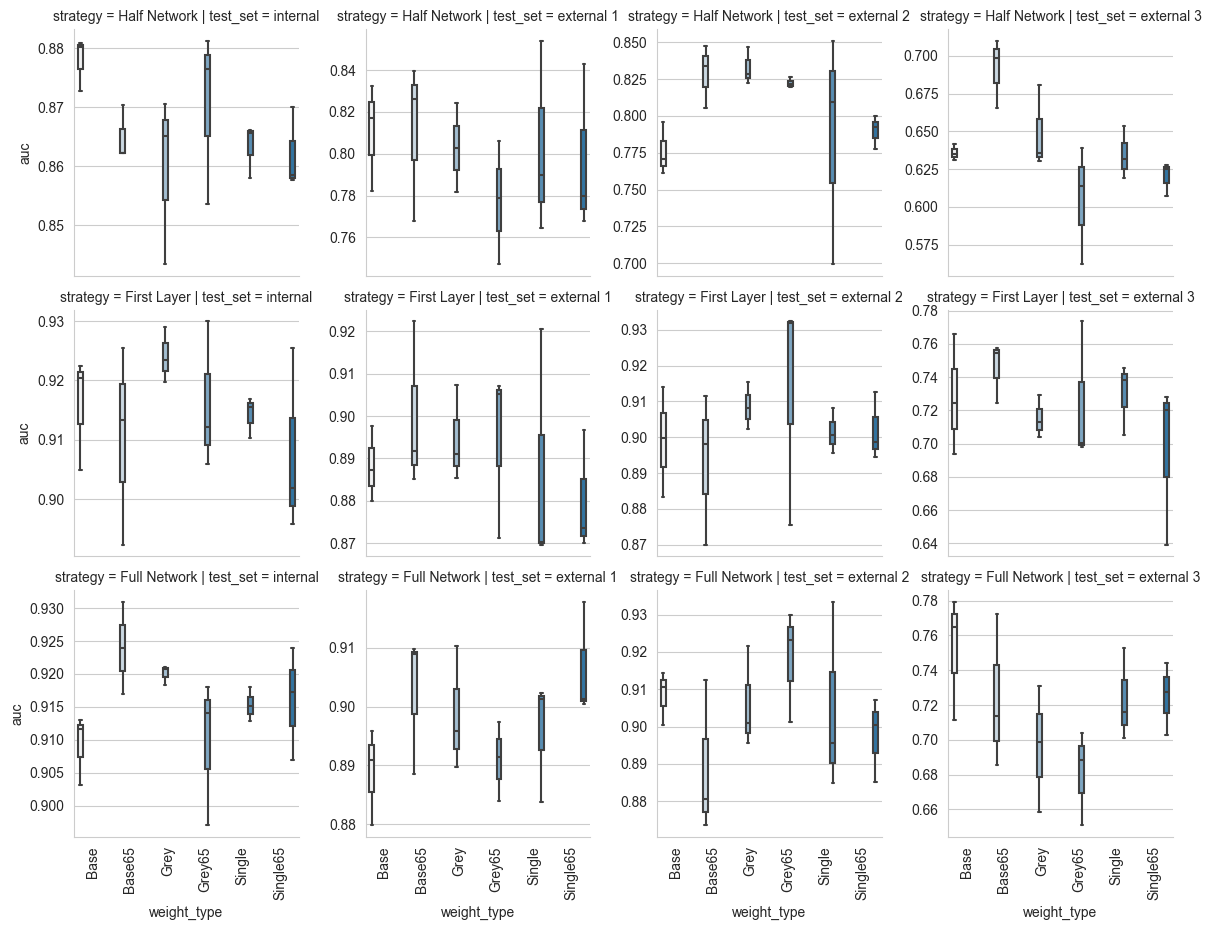

In [56]:
data = pd.read_csv('aucs.csv')
g = sns.FacetGrid(data, col="test_set",  row="strategy",sharey=False)
g.map_dataframe(sns.boxplot, x="weight_type", y="auc",hue="weight_type")
# g.set(ylim=(0.56, None))
g.set_xticklabels(rotation=90)

/var/folders/yd/8wk426s903d51rjcnsq8316c0000gn/T/ipykernel_6182/936626464.py:10: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  long_data = data.melt(id_vars=['strategy', 'weight_type'],
/var/folders/yd/8wk426s903d51rjcnsq8316c0000gn/T/ipykernel_6182/936626464.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


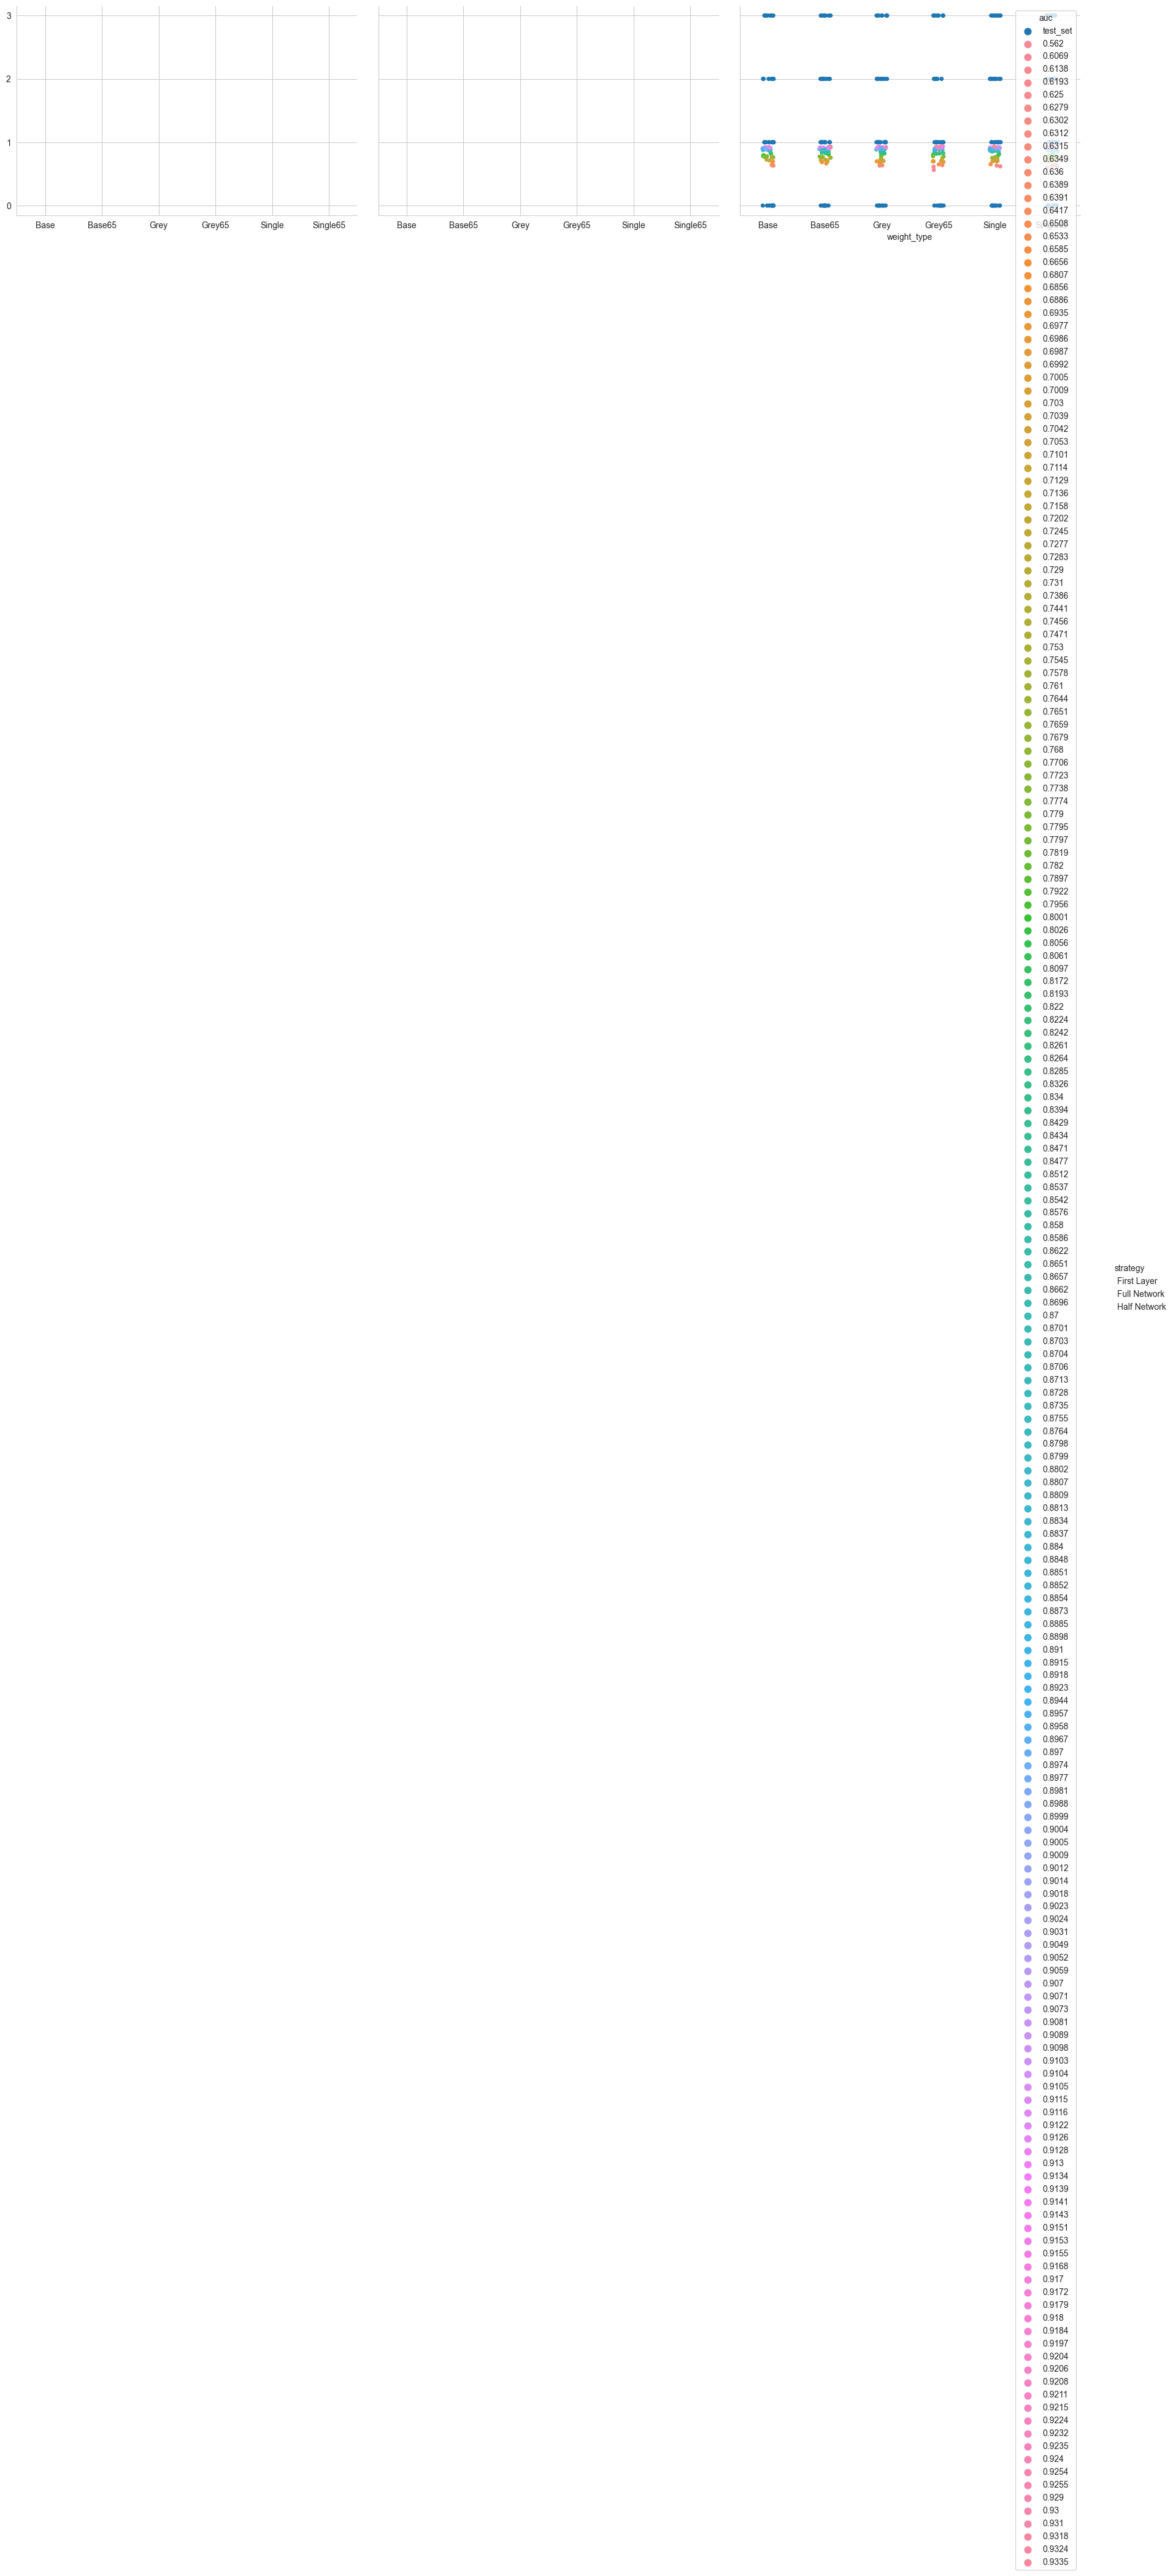

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data into a DataFrame
data = pd.read_csv('aucs.csv')
data['test_set']= data['test_set'].str.strip(" external").apply(lambda x: "0" if x == "i" else str(x))
# Reshape to long format if necessary
# Assuming each run has columns for different test sets and weight types
long_data = data.melt(id_vars=['strategy', 'weight_type'], 
                      var_name='test_set',
                      value_name='auc')

# Calculate mean across runs (optional)
mean_data = long_data.groupby(['strategy', 'weight_type', 'test_set'])['auc'].mean().reset_index()

# Set up the plotting
sns.set_style("whitegrid")
g = sns.FacetGrid(mean_data, col="strategy", hue="strategy",
                  palette=["blue", "green", "red"], 
                  aspect=1.5,
                  height=4)

for ax in g.axes:
    for i, test_set in enumerate(long_data['test_set'].unique()):
        if i == 0: continue
        sns.stripplot(x='weight_type', y='auc',
                      data=long_data[long_data['test_set'] == test_set],
                      hue=test_set)

g.add_legend()
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# Sample data: three runs for two metrics.
data = {
    "Run": [0, 1, 2] * 2,
    "Metric": ["AUC"] *3 + ["F1"]*3,
    "Value": [0.85, 0.78, 0.90, 0.65, 0.70, 0.68]
}

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Metric", y="Value", data=data)
plt.title("Distribution of Metrics Across Runs")
plt.xlabel("Metric Type (AUC/F1)")
plt.ylabel("Value")
plt.grid(True)
plt.show()

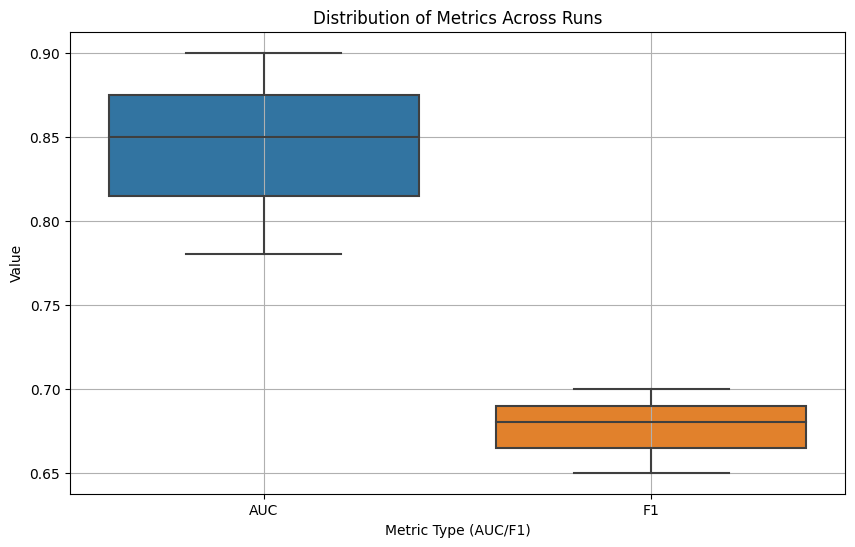

In [20]:
import seaborn as sns

# Sample data: three runs for two metrics.
data = {
    "Run": [0, 1, 2] * 2,
    "Metric": ["AUC"] *3 + ["F1"]*3,
    "Value": [0.85, 0.78, 0.90, 0.65, 0.70, 0.68]
}

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Metric", y="Value", data=data)
plt.title("Distribution of Metrics Across Runs")
plt.xlabel("Metric Type (AUC/F1)")
plt.ylabel("Value")
plt.grid(True)
plt.show()

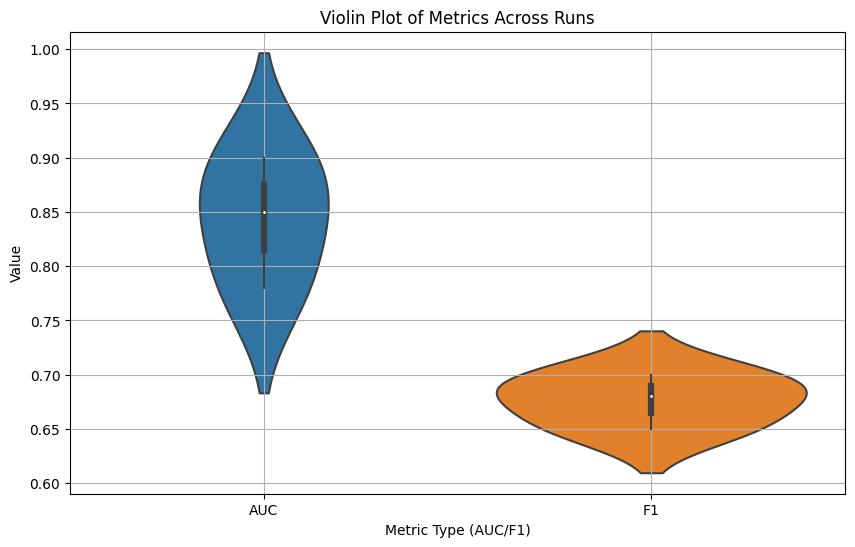

In [3]:
import seaborn as sns

# Sample data: three runs for two metrics.
data = {
    "Run": [0, 1, 2] * 2,
    "Metric": ["AUC"] *3 + ["F1"]*3,
    "Value": [0.85, 0.78, 0.90, 0.65, 0.70, 0.68]
}

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Metric", y="Value", data=data)
plt.title("Violin Plot of Metrics Across Runs")
plt.xlabel("Metric Type (AUC/F1)")
plt.ylabel("Value")
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

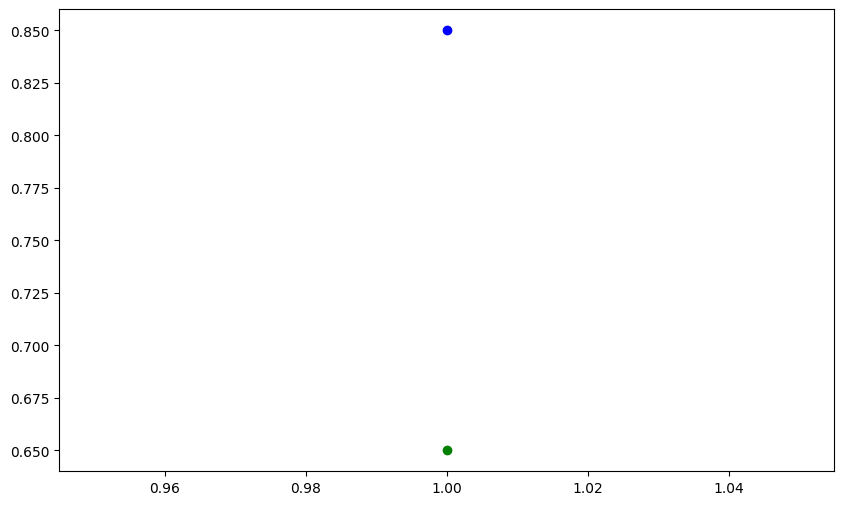

In [4]:
import matplotlib.pyplot as plt

# Sample data: three runs for two metrics.
runs = [0, 1, 2]
metric_a_values = [0.85, 0.78, 0.90]  # AUC values across runs (mean ± std)
metric_b_values = [0.65, 0.70, 0.68]  # F1 scores across runs

# Calculate mean and standard deviation for each metric.
mean_a = sum(metric_a_values) / len(metric_a_values)
std_a = round((sum((x - mean_a)**2 for x in metric_a_values)/len(metric_a_values))**0.5, 3)

mean_b = sum(metric_b_values) / len(metric_b_values)
std_b = round((sum((x - mean_b)**2 for x in metric_b_values)/len(metric_b_values))**0.5, 3)

# Plot
plt.figure(figsize=(10, 6))
for i, (a, b) in enumerate(zip(metric_a_values, metric_b_values)):
    plt.scatter(i+1, a, color='blue', label="AUC")
    plt.scatter(i+1, b, color='green', label="F1")
    
    # Add error bars for standard deviation
    plt.errorbar(i+1, mean_a if i == 2 else None, yerr=std_a / len(metric_a_values)**0.5,
                 fmt='none', capsize=5)
    plt.errorbar(i+1, mean_b if i == 2 else None, yerr=std_b / len(metric_b_values)**0.5,
                 fmt='none', capsize=5)

plt.title("Performance Metrics Across Runs")
plt.xlabel("Run Number (Average of Three)")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()